# 22 One-way ANOVA - Analysis of Variance

### .

### Overview
<span>
    <table>
        <tr><td>Testing Multiple Independent Samples<td><td>Case<td><tr>
        <tr><td>Grand Mean<td><td>Hypothesis<td><tr>
        <tr><td>ANOVA<td><td>Between-group Variability<td><tr>
        <tr><td>Within-group Variability<td><td>F-statistic<td><tr>
        <tr><td>Hypothesis Testing<td><td>ANOVA with f_oneway<td><tr>
        <tr><td>ANOVA Table<td><td>Eta Squared<td><tr>
        <tr><td>Tukey's HSD<td><tr>
    <table>
<span>

### Setup

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

## Supervised Classification
In this type of machine learing we tell the system the correct answer to a set a features. The system should be thaught so well that it is later capable of accurately classifying data it did not encounter before. Some examples of applications are; recognize someone in a picture from a set of tagged photos, spam filtering and recommender systems (music, movies, customers who buy this product also bought...)

### Features and Labels
We can describe a hidden object based on its features. A piece of music, for instance, can have continuous features like the song lenght, tempo, dynamics, intensity. Labels are the classes an object can belong to. In this case a class could be whether a song is liked or disliked by someone.

A classifier algorithm defines a decision surface (DS) to separate one class from another. If we know on which side of the boundary a new data point falls, we can predict what class it belongs to. The example below is a linear decision surface. The scatterplot shows two features (a, b) and the purple descision boundary separates two classes (1, 2).

C:\Users\shaurya.agarwal\AppData\Local\Temp\ipykernel_26928\3611532213.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({
D:\1\a3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


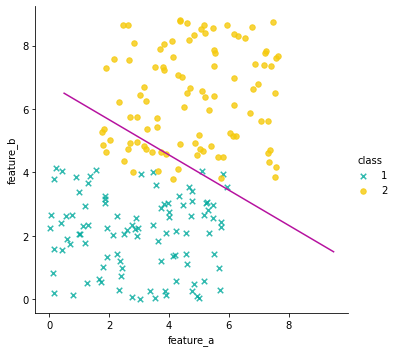

In [2]:
# Create and plot a linear descision surface
df = pd.DataFrame({'feature_a': np.random.rand(100) * 6, 
                   'feature_b': np.random.rand(100) * 4.2, 
                   'class': 1})
df = df.append(pd.DataFrame({
                   'feature_a': np.random.rand(100) * 6 + 1.7, 
                   'feature_b': np.random.rand(100) * np.random.randint(5,6) + 3.8, 
                   'class': 2}))

sns.lmplot("feature_a", "feature_b", df, hue='class', 
           markers=["x", "o"], scatter_kws={"s": 30}, fit_reg=False);

plt.plot([9.5,0.5], [1.5,6.5], color='#B6129F')
plt.show()

## Gaussian Naive Bayes Classifier
Naive Bayes Classifiers are a set of supervised machine learning classifiers based on applying [Bayes' Theorem](http://unsupervised-learning.com/bayes-theorem-conditional-probability/). The reason it is called naive is mainly because the algorithms assume independence between features. For example, a solely naive Bayes spam filter only looks at the words separately and doesn't take the word order into account.

In the example below we use the training set from the example above to train a [Gaussian Naive Bayes Classifier](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) found in scikit-learn called [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB). The likelihood of the chosen features in the data is assumed to folow the [Bell curve](http://en.wikipedia.org/wiki/The_Bell_Curve).

In [3]:
# First shuffle the labeled dataframe
def shuffle(data, n):
    ind = data.index
    for i in range(n):
       sampler = np.random.permutation(data.shape[0])
       new_vals = data.take(sampler).values
       data = pd.DataFrame(new_vals, index=ind)
    return data

df = shuffle(df, 1)
df.columns = ['class', 'feature_a', 'feature_b']
df.head()

      class  feature_a  feature_b
0  3.625806   1.824695        1.0
1  4.572750   2.076480        1.0
2  2.491411   2.065323        1.0
3  6.772670   8.583848        2.0
4  6.313524   8.299766        2.0

In [4]:
# Create a training set of 3/4 of the data
train_n = 150

train_features = df[['feature_a', 'feature_b']][:train_n]
train_labels = df['class'][:train_n]
train_features.describe()

        feature_a   feature_b
count  150.000000  150.000000
mean     4.030126    1.466667
std      2.512379    0.500559
min      0.011006    1.000000
25%      2.094530    1.000000
50%      3.915104    1.000000
75%      5.713395    2.000000
max      8.775865    2.000000

In [5]:
# Create a test set of 1/4 of the data to evaluate the classifier
test_features = df[['feature_a', 'feature_b']][train_n:]
test_labels = df['class'][train_n:]
test_features.describe()

       feature_a  feature_b
count  50.000000  50.000000
mean    4.781285   1.600000
std     2.575699   0.494872
min     0.099511   1.000000
25%     2.424090   1.000000
50%     4.777697   2.000000
75%     6.954598   2.000000
max     8.799447   2.000000

In [6]:
# Train a Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_features, train_labels)
clf.predict([4.8, 4.2])

ValueError: Unknown label type: (array([0.01732276, 0.07082236, 0.13654358, 0.16228901, 0.22994268,
       0.38872522, 0.4182926 , 0.44371691, 0.55133097, 0.58701926,
       0.69981302, 0.88327937, 0.98136406, 1.00112805, 1.03599474,
       1.1435543 , 1.20523917, 1.25969634, 1.30995221, 1.35264649,
       1.55405779, 1.67966476, 1.72422068, 1.75266045, 1.80764865,
       1.81052283, 1.84100983, 1.89312588, 1.89951507, 2.02693487,
       2.11998903, 2.16471666, 2.25303603, 2.31832737, 2.34901161,
       2.35863442, 2.38671938, 2.42478898, 2.45935378, 2.49141101,
       2.61918214, 2.63419711, 2.67859051, 2.68443688, 2.71657627,
       2.75508259, 2.80440634, 2.84227399, 2.86966969, 2.90958197,
       2.9493533 , 3.0186555 , 3.06850693, 3.17348642, 3.22833642,
       3.24406636, 3.27476223, 3.35929574, 3.42198201, 3.46275141,
       3.46787012, 3.54789217, 3.62580624, 3.63212651, 3.73294222,
       3.73707311, 3.74842446, 3.83814651, 3.83883434, 3.84981877,
       3.88226877, 3.89768304, 3.89856834, 3.91410867, 3.96249421,
       4.00856601, 4.01821112, 4.09174453, 4.13139756, 4.14446291,
       4.2040057 , 4.2252455 , 4.24028824, 4.28751763, 4.29031191,
       4.33292562, 4.36372958, 4.37847903, 4.47376507, 4.51313625,
       4.57274975, 4.58637171, 4.59333254, 4.5954424 , 4.66017749,
       4.67982704, 4.74706038, 4.76313092, 4.77244695, 4.78691204,
       4.83826272, 4.87578953, 4.995689  , 5.00877024, 5.03825671,
       5.0809355 , 5.11898189, 5.12902372, 5.15783499, 5.16861429,
       5.17259084, 5.20577975, 5.20780612, 5.26879223, 5.3027752 ,
       5.32558351, 5.33877767, 5.40909946, 5.47460518, 5.47467907,
       5.48236938, 5.49304197, 5.50811904, 5.51350788, 5.62471553,
       5.70418848, 5.72952983, 5.74865797, 5.75045809, 5.80640068,
       5.93201849, 5.93929374, 6.1407122 , 6.15742724, 6.16747797,
       6.25316911, 6.31352369, 6.52970054, 6.77267007, 6.79220904,
       6.86304626, 7.0840477 , 7.19834216, 7.23749501, 7.30293774,
       7.31840431, 7.3443075 , 7.42631323, 7.56185068, 7.58478532]),)

In [ ]:
# Query the accuracy of the model with the test set
accuracy = clf.score(test_features, test_labels)
print(accuracy)

In [ ]:
# Another, more generic, way to calculate accuracy in scikit-learn
from sklearn.metrics import accuracy_score
print((accuracy_score(clf.predict(test_features), test_labels)))

In [ ]:
def plot_decision_surface(clf, features, labels, title):
    x_min = 0.0; x_max = 8.0
    y_min = 0.0; y_max = 8.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
    z_min, z_max = -np.abs(Z).max(), np.abs(Z).max()
    
    # set title
    f, ax = plt.subplots()
    ax.set_title(title)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z, cmap='gray', vmin=.2, vmax=2.4)  # 

    # Plot the points
    class_1_x = [features[ii][0] for ii in range(0, len(features)) if labels[ii]==1]
    class_1_y = [features[ii][1] for ii in range(0, len(features)) if labels[ii]==1]
    class_2_x = [features[ii][0] for ii in range(0, len(features)) if labels[ii]==2]
    class_2_y = [features[ii][1] for ii in range(0, len(features)) if labels[ii]==2]

    plt.scatter(class_1_x, class_1_y, color = '#F5CA0C', label="1", s=40)
    plt.scatter(class_2_x, class_2_y, color = '#00A99D', label="2", s=40)
   
    plt.xlabel("feature_a")
    plt.ylabel("feature_b")
    plt.legend(('class 1', 'class 2'), frameon=True)
    
    
# Plot the decision surface and data point for training and tests data
plot_decision_surface(clf, train_features.values, train_labels.values, 
                      'Training data')
plot_decision_surface(clf, test_features.values, test_labels.values,
                      'Test data')

### Done!

#### Next: _Independent Events and Compound Probability_